R-FCN发表于2016年的论文"R-FCN: Object Detection via Region-based Fully Convolutional Networks"，出自何凯明团队。在faster rcnn的基础上提出一种全卷积网络，在保持精度的同时速度提升至原来的2.5~20x。

$网络总体结构如下图，基础网络提取出特征图，然后经过K^2(C+1)维的卷积，变为K^2(C+1)维的\\特征图（position-sensitive score maps），RPN网络提取ROI区域，对于每一个ROI区域，分\\为KxK个bins，每个bin去对应的特征图找映射（如左上角的bin映射到橙色的特征图），并做\\position-sensitive pooling(average pooling)，如一个bin为12x12，K=3,分为9个bins，左\\上角的bin尺寸为3x3，这个bin映射到橙色的特征图，得到3x3x(C+1)维的特征图，然后做\\average pooling，变为1x1x(c+1)维的特征图。每个bin做完映射与pooling之后，拼接成\\KxKx(C+1)的特征向量，然后做voting，即对(c+1)维的每一维做average，最终得到1x1x(C+1)\\维的特征向量，训练时用softmax计算loss。对于回归分支，也是同样，只是\\K^2(C+1)变为K^2x4$
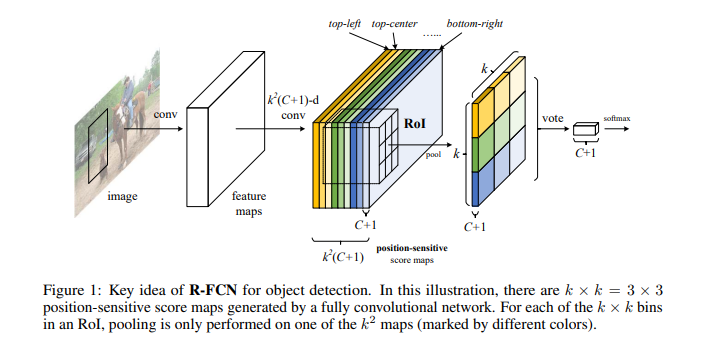

该网络为检测增加位置信息，有利于定位的准确性。就像faster rcnn将roi pooling加在conv4与conv5之间，与直接加到conv5之后，精度相差约10个点，pooling提前可以增强特征的位置信息。

训练是是采用4-step训练策略。

为了提升基础特征图的分辨率，将下采样倍数由32降为16，并在conv用atrous conv代替常规conv。